In [1]:
import pandas as pd

from sklearn.datasets import load_diabetes

from urllib.request import urlretrieve

In [2]:
# Y -> 25 ~ 346

url = 'https://www4.stat.ncsu.edu/~boos/var.select/diabetes.tab.txt'

urlretrieve(url, "diabetes.txt")

df = pd.read_csv("diabetes.txt", encoding="utf-8", sep="\t")

df

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
0,59,2,32.1,101.00,157,93.2,38.0,4.00,4.8598,87,151
1,48,1,21.6,87.00,183,103.2,70.0,3.00,3.8918,69,75
2,72,2,30.5,93.00,156,93.6,41.0,4.00,4.6728,85,141
3,24,1,25.3,84.00,198,131.4,40.0,5.00,4.8903,89,206
4,50,1,23.0,101.00,192,125.4,52.0,4.00,4.2905,80,135
...,...,...,...,...,...,...,...,...,...,...,...
437,60,2,28.2,112.00,185,113.8,42.0,4.00,4.9836,93,178
438,47,2,24.9,75.00,225,166.0,42.0,5.00,4.4427,102,104
439,60,2,24.9,99.67,162,106.6,43.0,3.77,4.1271,95,132
440,36,1,30.0,95.00,201,125.2,42.0,4.79,5.1299,85,220


pandas API: axis參數特別重要, 因為他決定方向(axis=0/1)

In [8]:
import numpy as np

from sklearn.model_selection import train_test_split

x = df.drop("Y", axis=1)
y = df["Y"]

x_np = np.array(x)
y_np = np.array(y)

x_train, x_test, y_train, y_test = train_test_split(x_np, y_np, test_size=0.1)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(397, 10)
(45, 10)
(397,)
(45,)


In [4]:
from sklearn.tree import DecisionTreeRegressor

reg = DecisionTreeRegressor(max_depth=3)

reg.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=3)

age age in years

sex

bmi body mass index

bp average blood pressure

s1 tc, total serum cholesterol

s2 ldl, low-density lipoproteins

s3 hdl, high-density lipoproteins

s4 tch, total cholesterol / HDL

s5 ltg, possibly log of serum triglycerides level

s6 glu, blood sugar level

回歸樹根分類樹一樣, 目的: 讓你在回答問題的時候更有信心

1. 分類樹: 選擇一個分支, 讓你的Gini(猜錯機率)越小越好
2. 回歸樹: 選擇一個分支, 讓你的MSE(猜錯機率)(數值分布範圍)越小越好

MSE(每個點和平均的距離平均) = $ \frac{1}{n} \sum (p_i - \mu)^2 $

[Text(0.5, 0.875, 'S5 <= 4.6\nsquared_error = 5902.231\nsamples = 397\nvalue = 152.562'),
 Text(0.25, 0.625, 'BMI <= 26.95\nsquared_error = 3409.193\nsamples = 191\nvalue = 110.675'),
 Text(0.125, 0.375, 'S3 <= 55.5\nsquared_error = 2224.016\nsamples = 148\nvalue = 96.365'),
 Text(0.0625, 0.125, 'squared_error = 2943.384\nsamples = 73\nvalue = 109.767'),
 Text(0.1875, 0.125, 'squared_error = 1178.831\nsamples = 75\nvalue = 83.32'),
 Text(0.375, 0.375, 'AGE <= 26.5\nsquared_error = 4357.507\nsamples = 43\nvalue = 159.93'),
 Text(0.3125, 0.125, 'squared_error = 784.0\nsamples = 2\nvalue = 274.0'),
 Text(0.4375, 0.125, 'squared_error = 3866.134\nsamples = 41\nvalue = 154.366'),
 Text(0.75, 0.625, 'BMI <= 31.55\nsquared_error = 5078.764\nsamples = 206\nvalue = 191.398'),
 Text(0.625, 0.375, 'BMI <= 24.35\nsquared_error = 4388.957\nsamples = 161\nvalue = 175.528'),
 Text(0.5625, 0.125, 'squared_error = 2911.142\nsamples = 38\nvalue = 137.447'),
 Text(0.6875, 0.125, 'squared_error = 4259.101

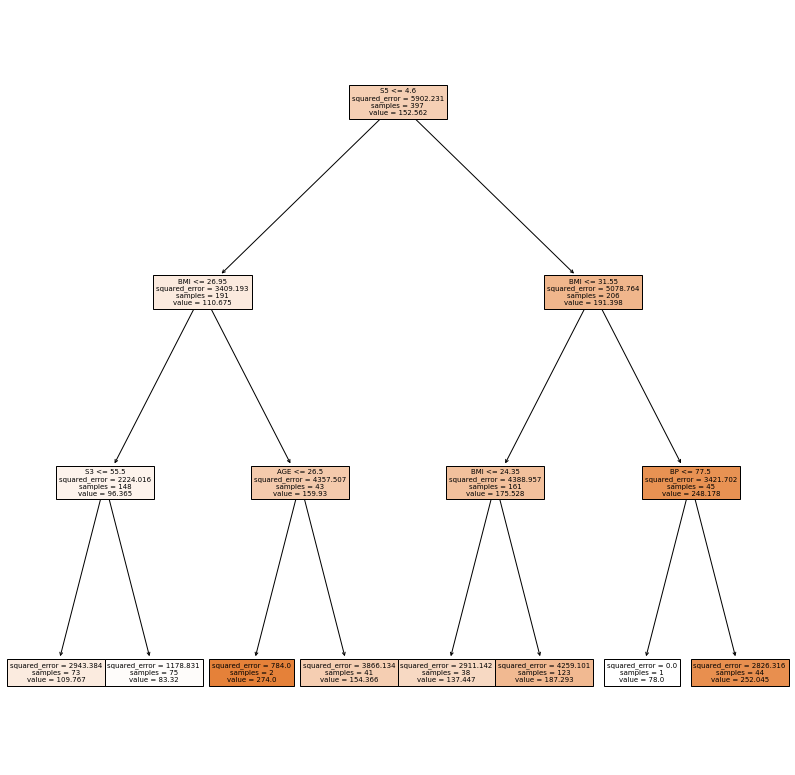

In [5]:
import matplotlib.pyplot as plt

from sklearn.tree import plot_tree

plt.figure(figsize=(14, 14))

plot_tree(reg, 
     feature_names=x.columns, 
     filled=True)

r^2 score (統一衡量標準)
 
$ a(認真猜) = \frac{1}{n} \sum (pre_i - true_i) ^ 2 $
 
$ b(瞎猜真實值平均) = \frac{1}{n} \sum (\mu - true_i) ^ 2 $
 
$ r^2 score = 1 - \frac{a}{b} $
 
0: 你跟瞎猜同等級
1: 你猜的完美準

In [11]:
from sklearn.metrics import r2_score

pre = reg.predict(x_test)

r2_score(y_test, pre)

0.42836773267557127